# readme
descrip: plot DSL and its decomposed components with AMOC regression for reviewer 2 <br>

update history: <br>
v1.0 DL 2022Jan14 <br>

extra notes: <br>

# import modules

In [1]:
# general python packages
import numpy as np
from scipy import stats
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
# import matplotlib.dates as mdates
%matplotlib inline
import proplot as plot
import cartopy
import cartopy.crs as ccrs
cartopy.config['pre_existing_data_dir']='/ihesp/shared/cartopy_features'
# from cartopy.mpl.geoaxes import GeoAxes
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
# from mpl_toolkits.axes_grid1 import AxesGrid

# python GCM(POP) packages
# import xgcm
# import pop_tools
# import xoak
# import xesmf as xe

# dask jupyter lab packages
from dask.distributed import Client
# from dask.distributed import performance_report

# file name with time packages
# from itertools import product
# from cftime import DatetimeNoLeap

# incorporate dask 

In [2]:
client = Client("tcp://10.73.3.176:44618")
client

<Client: 'tcp://10.73.1.42:38506' processes=16 threads=16, memory=316.64 GiB>

# define parameters

In [3]:
# === r: region (US east coast excluding Gulf of Mexico) ===
# reference: Plot2FindGulfMexicoYucatanChannelFLstraitnlatnlonIndex_2021Jul20.ipynb
nlon1_r_t12, nlon2_r_t12 = 200+50, 700-50 
nlat1_r_t12, nlat2_r_t12 = 1300+100, 2000-100

nlon1_r_g16, nlon2_r_g16 = 260, 321
nlat1_r_g16, nlat2_r_g16 = 230, 350

lon1_r, lon2_r = -85, -50
lat1_r, lat2_r = 25, 55

# box1 (bx1), southeast US coast box
lon1_bx1, lon2_bx1 = -82, -79
lat1_bx1, lat2_bx1 = 30, 33
# box2 (bx2), northeast US coast box
lon1_bx2, lon2_bx2 = -71, -68
lat1_bx2, lat2_bx2 = 40.5, 43.5
# ===========================================================

time2 = np.arange(2001.5,2100.5+1,1) # 2001-2100 time period 2
time_en = np.arange(1850,2100+1,1) # 1850-2100 entire time period

chunks_HR = {'nlat':400,'nlon':300}
chunks_LR = {'nlat':384,'nlon':320}

outdir = '/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/pics/'
pic1 = outdir+'DSLDecompoAMOCregression4reviewer2_2022Jan14.png' # main text fig

# read files 

In [4]:
#TH: transient HR
infile_ssh_TH = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
                 'data_after_manipulation/SSH/'
                 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc')

ds_ssh_TH_raw = xr.open_dataset(infile_ssh_TH,chunks=chunks_HR)
ds_ssh_TH = ds_ssh_TH_raw.assign_coords(time=time_en)

infile1_ssh_CH = ('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
                  'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.SSH.0021.0501.nc')
ds_ssh_CH_raw = xr.open_dataset(infile1_ssh_CH, chunks=chunks_HR)
print(ds_ssh_CH_raw.time)
# 250-->1850, 500-->2100
# 21-->1621,  501-->2101, 1850-(250-21)=1621
time_ssh_CH = xr.cftime_range(start="1621", end="2102", freq='Y', calendar='noleap') 
# 2102 is not included, 2101 is the last year
ds_ssh_CH = ds_ssh_CH_raw.assign_coords(time=time_ssh_CH).sel(time=slice('1850','2100')).assign_coords(time=time_en)
ds_ssh_CH

<xarray.DataArray 'time' (time: 481)>
array([cftime.DatetimeNoLeap(21, 7, 16, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(22, 7, 16, 22, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(23, 7, 16, 22, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(499, 7, 2, 5, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(500, 7, 2, 5, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(501, 7, 2, 5, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0021-07-16 22:00:00 ... 0501-07-02 05:00:00
Attributes:
    long_name:     time
    bounds:        time_bound
    cell_methods:  time: mean


<xarray.Dataset>
Dimensions:     (d2: 2, nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time        (time) int64 1850 1851 1852 1853 1854 ... 2097 2098 2099 2100
    TLONG       (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT        (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: d2, nlat, nlon
Data variables:
    time_bound  (time, d2) object dask.array<chunksize=(251, 2), meta=np.ndarray>
    SSH         (time, nlat, nlon) float32 dask.array<chunksize=(251, 400, 300), meta=np.ndarray>
Attributes:
    title:         B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2019-05-27 at 10:36:42.5
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  19331
    tavg_sum:      2676600.0
    history:       Thu May 21 22:18:12 2020: ncra -F -d time,1,12 B.E.13.B185...
    NCO:           netCDF Operators version 4.7.9 (Homepage = http://nco.sf.n...

In [5]:
infile1_ssh_TL = ('/scratch/user/dapengli/Projects4iHESP/Project_SeaLevelUSEastCoast_2021Mar30/'
                  'data_after_manipulation/SSH/'
                  'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.SSH.1850-2100_2021Apr05.nc')
ds_ssh_TL = xr.open_dataset(infile1_ssh_TL,chunks=chunks_LR)
ds_ssh_TL = ds_ssh_TL.assign_coords(time=time_en)

infile1_ssh_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
                  'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.SSH.000101.050012.nc')
ds_ssh_CL_raw = xr.open_dataset(infile1_ssh_CL,chunks=chunks_LR)
print(ds_ssh_CL_raw.time)
# 250-->1850, 500-->2100
# 1-->1601, # 1850-(250-1)=1601
time_ssh_CL = xr.cftime_range(start="1601-01", end="2101-01", freq='M', calendar='noleap')
# 2101-01 is not included, the last time is 2100-12
ds_ssh_CL = ds_ssh_CL_raw.assign_coords(time=time_ssh_CL).sel(time=slice('1850','2100')).resample(
                          time='A').mean('time').assign_coords(time=time_en)
ds_ssh_CL

<xarray.DataArray 'time' (time: 6000)>
array([cftime.DatetimeNoLeap(1, 2, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 3, 1, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(1, 4, 1, 0, 0, 0, 0, has_year_zero=True), ...,
       cftime.DatetimeNoLeap(500, 10, 17, 0, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(500, 11, 16, 12, 0, 0, 0, has_year_zero=True),
       cftime.DatetimeNoLeap(500, 12, 17, 0, 0, 0, 0, has_year_zero=True)],
      dtype=object)
Coordinates:
  * time     (time) object 0001-02-01 00:00:00 ... 0500-12-17 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound


<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 251)
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    SSH      (time, nlat, nlon) float32 dask.array<chunksize=(1, 384, 320), meta=np.ndarray>

In [6]:
infile_hst_TH = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
ds_hst_TH_raw = xr.open_dataset(infile_hst_TH) # do not use dask because I will drop 2033, 2038 and 2052 spike values
# Warning occurrs with chunks=chunks_HR (PerformanceWarning: Slicing is producing a large chunk.) 
ds_hst_TH_raw = ds_hst_TH_raw.assign_coords(time=time_en)

ds_hst_TH_despk = ds_hst_TH_raw.drop_sel(time=[2033,2038,2052]) 
# despk: despike, 2033, 2038, 2052 are spikes in global av steric height time series, drop them
ds_hst_TH = ds_hst_TH_despk.interp(time=time_en)
ds_hst_TH

infile_hst_CH = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
ds_hst_CH_raw = xr.open_dataset(infile_hst_CH,chunks=chunks_HR)
ds_hst_CH = ds_hst_CH_raw.assign_coords(time=time_en)
ds_hst_CH

<xarray.Dataset>
Dimensions:  (nlat: 2400, nlon: 3600, time: 251)
Coordinates:
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(400, 300), meta=np.ndarray>
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 400, 300), meta=np.ndarray>

In [7]:
infile_hst_TL = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.BRCP85C5CN.ne30g16.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
ds_hst_TL_raw = xr.open_dataset(infile_hst_TL,chunks=chunks_LR)

yrs_TL = time_en[time_en != 2014] # TL miss 2014Jan, so no yr-av for 2014

ds_hst_TL_raw = ds_hst_TL_raw.assign_coords(time=yrs_TL)
ds_hst_TL = ds_hst_TL_raw.interp(time=time_en).assign_coords(time=time_en)
ds_hst_TL 

infile_hst_CL = ('/scratch/user/dapengli/Projects4iHESP/'
                 'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
                 'RegionalStericHeight/test_2021Apr20/'
                 'B.E.13.B1850C5.ne30g16.sehires38.003.sunway_RegionalStericHeight250-500_2021May21.nc')
ds_hst_CL_raw = xr.open_dataset(infile_hst_CL,chunks=chunks_LR)

yrs_CL_raw = np.arange(250,500+1)
yrs_CL = np.delete(yrs_CL_raw,[374-250, 398-250, 401-250, 417-250, 445-250]) # missing values in these years

ds_hst_CL_raw = ds_hst_CL_raw.assign_coords(time=yrs_CL)
ds_hst_CL = ds_hst_CL_raw.interp(time=yrs_CL_raw).assign_coords(time=time_en)
ds_hst_CL

<xarray.Dataset>
Dimensions:  (nlat: 384, nlon: 320, time: 251)
Coordinates:
    TLONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    TLAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULONG    (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
    ULAT     (nlat, nlon) float64 dask.array<chunksize=(384, 320), meta=np.ndarray>
  * time     (time) int64 1850 1851 1852 1853 1854 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon
Data variables:
    h_rst    (time, nlat, nlon) float64 dask.array<chunksize=(251, 384, 320), meta=np.ndarray>

In [8]:
# read moc TL
infile_MOC_TL = ('/ihesp/archive/Sunway_Runs/LR_HF_TNST/'
                 'B.E.13.BTRANS.ne30g16.sehires38.003.sunway.pop.h.MOC.185001.210012.nc')
ds_MOC_TL_raw = xr.open_dataset(infile_MOC_TL) # , chunks={'moc_z':1}
time_s_TL = ds_MOC_TL_raw.time.to_pandas().index.shift(-1,'D')
ds_MOC_TL = ds_MOC_TL_raw.assign_coords(time=time_s_TL).sel(time=slice('1850','2100'))
print('ds_MOC_TL.time[0]', ds_MOC_TL.time[0].values)
print('ds_MOC_TL.time[-1]', ds_MOC_TL.time[-1].values)
print('len(ds_MOC_TL.time)', len(ds_MOC_TL.time))
ds_MOC_TL

ds_MOC_TL.time[0] 1850-01-31 00:00:00
ds_MOC_TL.time[-1] 2100-12-31 00:00:00
len(ds_MOC_TL.time) 3012


<xarray.Dataset>
Dimensions:         (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, time: 3012, transport_reg: 2)
Coordinates:
  * time            (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: d2, moc_comp, transport_reg
Data variables:
    time_bound      (time, d2) object ...
    moc_components  (moc_comp) |S256 ...
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
Attributes:
    title:         B.E.13.BHISTC5.ne30g16.sehires38.003.sunway
    history:       none
    Conventions:   CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curren...
    contents:      Diagnostic and Prognostic Variables
    source:        CCSM POP2, the CCSM Ocean Component
    revision:      $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:      All years have exactly  365 days.
    start_time:    This dataset was created on 2020-04-11 at 22:22:40.9
    cell_methods:  cell_methods = time: mean ==> the variable values are aver...
    nsteps_total:  750
    tavg_sum:      2592000.0

In [9]:
# read moc CL
infile_MOC_CL = ('/ihesp/archive/Sunway_Runs/LR_PI_CTRL/'
                 'B.E.13.B1850C5.ne30g16.sehires38.003.sunway.pop.h.MOC.000101.050012.nc')
ds_MOC_CL_raw = xr.open_dataset(infile_MOC_CL) # , chunks={'moc_z':1}
time_s_CL = ds_MOC_CL_raw.time.to_pandas().index.shift(-1,'D')
ds_MOC_CL = ds_MOC_CL_raw.assign_coords(time=time_s_CL).sel(time=slice('0250','0500'))
print('ds_MOC_CL.time[0]', ds_MOC_CL.time[0].values)
print('ds_MOC_CL.time[-1]', ds_MOC_CL.time[-1].values)
print('len(ds_MOC_CL.time)', len(ds_MOC_CL.time))
ds_MOC_CL

ds_MOC_CL.time[0] 0250-01-31 00:00:00
ds_MOC_CL.time[-1] 0500-12-31 00:00:00
len(ds_MOC_CL.time) 3012


<xarray.Dataset>
Dimensions:         (d2: 2, lat_aux_grid: 395, moc_comp: 3, moc_z: 61, nchar: 256, time: 3012, transport_reg: 2)
Coordinates:
  * time            (time) object 0250-01-31 00:00:00 ... 0500-12-31 00:00:00
  * lat_aux_grid    (lat_aux_grid) float32 -79.49 -78.95 -78.42 ... 89.47 90.0
  * moc_z           (moc_z) float32 0.0 1e+03 2e+03 ... 5e+05 5.25e+05 5.5e+05
Dimensions without coordinates: d2, moc_comp, nchar, transport_reg
Data variables:
    time_bound      (time, d2) object ...
    moc_components  (moc_comp, nchar) |S1 ...
    MOC             (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...
Attributes:
    title:           B.E.13.B1850C5.ne30g16.sehires38.003.sunway
    history:         none
    Conventions:     CF-1.0; http://www.cgd.ucar.edu/cms/eaton/netcdf/CF-curr...
    contents:        Diagnostic and Prognostic Variables
    source:          CCSM POP2, the CCSM Ocean Component
    revision:        $Id: tavg.F90 56176 2013-12-20 18:35:46Z mlevy@ucar.edu $
    calendar:        All years have exactly  365 days.
    start_time:      This dataset was created on 2020-03-12 at 12:53:17.5
    cell_methods:    cell_methods = time: mean ==> the variable values are av...
    nsteps_total:    750
    tavg_sum:        2592000.0
    tavg_sum_qflux:  2592000.0

In [10]:
# read moc TH
infile_MOC_TH = ('/ihesp/archive/Sunway_Runs/HR_HF_TNST/'
                 'B.E.13.BTRANS.ne120_t12.sehires38.003.sunway.pop.h.MOC.185001.210012.nc')
ds_MOC_TH_raw = xr.open_dataset(infile_MOC_TH) # , chunks={'moc_z':1}
time_s_TH = ds_MOC_TH_raw.time.to_pandas().index.shift(-1,'D')
ds_MOC_TH = ds_MOC_TH_raw.assign_coords(time=time_s_TH).sel(time=slice('1850','2100'))
print('ds_MOC_TH.time[0]', ds_MOC_TH.time[0].values)
print('ds_MOC_TH.time[-1]', ds_MOC_TH.time[-1].values)
print('len(ds_MOC_TH.time)', len(ds_MOC_TH.time))
ds_MOC_TH

ds_MOC_TH.time[0] 1850-01-31 00:00:00
ds_MOC_TH.time[-1] 2100-12-31 00:00:00
len(ds_MOC_TH.time) 3012


<xarray.Dataset>
Dimensions:            (lat_aux_grid: 395, moc_comp: 1, moc_z: 63, time: 3012, transport_reg: 2)
Coordinates:
  * time               (time) object 1850-01-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  (transport_reg) |S256 ...
    moc_components     (moc_comp) |S256 ...
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC                (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

In [11]:
# read moc CH
infile_MOC_CH = ('/ihesp/archive/Sunway_Runs/HR_PI_CTRL/'
                 'B.E.13.B1850C5.ne120_t12.sehires38.003.sunway_02.pop.h.MOC.002101.050112.nc')
ds_MOC_CH_raw = xr.open_dataset(infile_MOC_CH) # , chunks={'moc_z':1}
time_s_CH = ds_MOC_CH_raw.time.to_pandas().index.shift(-1,'D')
ds_MOC_CH = ds_MOC_CH_raw.assign_coords(time=time_s_CH).sel(time=slice('0250','0500'))
print('ds_MOC_CH.time[0]', ds_MOC_CH.time[0].values)
print('ds_MOC_CH.time[-1]', ds_MOC_CH.time[-1].values)
print('len(ds_MOC_CH.time)', len(ds_MOC_CH.time))
ds_MOC_CH

ds_MOC_CH.time[0] 0250-01-31 00:00:00
ds_MOC_CH.time[-1] 0500-12-31 00:00:00
len(ds_MOC_CH.time) 3012


<xarray.Dataset>
Dimensions:            (lat_aux_grid: 395, moc_comp: 1, moc_z: 63, time: 3012, transport_reg: 2)
Coordinates:
  * time               (time) object 0250-01-31 00:00:00 ... 0500-12-31 00:00:00
    transport_regions  (transport_reg) |S256 ...
    moc_components     (moc_comp) |S256 ...
  * moc_z              (moc_z) float32 0.0 1e+03 2e+03 ... 5.75e+05 6e+05
  * lat_aux_grid       (lat_aux_grid) float32 -79.49 -78.95 ... 89.47 90.0
Dimensions without coordinates: moc_comp, transport_reg
Data variables:
    MOC                (time, transport_reg, moc_comp, moc_z, lat_aux_grid) float32 ...

In [12]:
# supplimentary files 
infile0_LR = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/HistoryFilesPOP/'
              'cmpr_B.E.13.BHISTC5.ne30g16.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_LR = xr.open_dataset(infile0_LR)
ds0_LR

infile0_HR = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/HistoryFilesPOP/'
              'B.E.13.BHISTC5.ne120_t12.sehires38.003.sunway.pop.h.1850-01.nc')
ds0_HR = xr.open_dataset(infile0_HR)
ds0_HR

infile_t12 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/POP_grids_2021Nov01/'
              'POPgrids_tx0.1v2_2020Jun29.nc') # POP t12 grid file
ds_t12 = xr.open_dataset(infile_t12)
ds_t12

infile_g16 = ('/ihesp/user/dapengli/Projects4iHESP/SupplementaryFiles4POP/POP_grids_2021Nov01/'
              'POPgrids_gx1v6_2020Jun29.nc') # POP g16 grid file
ds_g16 = xr.open_dataset(infile_g16)
ds_g16

ds_r_t12 = ds_t12.isel(nlon=slice(nlon1_r_t12, nlon2_r_t12), 
                       nlat=slice(nlat1_r_t12, nlat2_r_t12))
ds_r_g16 = ds_g16.isel(nlon=slice(nlon1_r_g16, nlon2_r_g16), 
                       nlat=slice(nlat1_r_g16, nlat2_r_g16))

# data analysis 

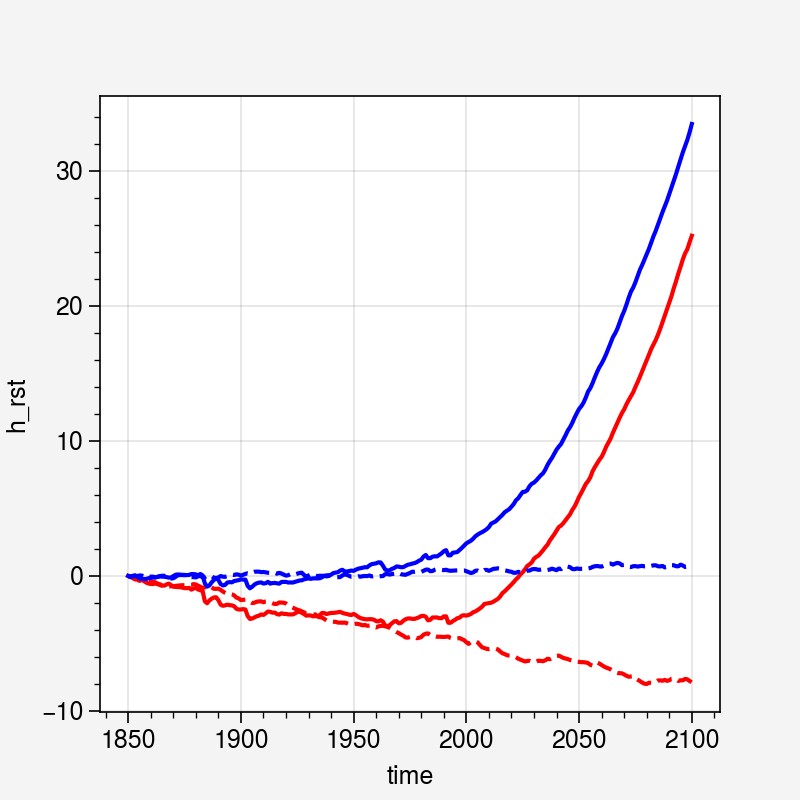

In [13]:
h_rst_gl_av_TH = ds_hst_TH.h_rst.weighted(ds_t12.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_CH = ds_hst_CH.h_rst.weighted(ds_t12.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_TL = ds_hst_TL.h_rst.weighted(ds_g16.TAREA).mean(("nlon", "nlat")).compute()
h_rst_gl_av_CL = ds_hst_CL.h_rst.weighted(ds_g16.TAREA).mean(("nlon", "nlat")).compute()

h_rst_gl_a_TH = h_rst_gl_av_TH - h_rst_gl_av_TH.isel(time=0) # a: anomaly
# h_rst_gl_a_TH = h_rst_gl_a_TH.where(h_rst_gl_a_TH<50, np.nan) # mask spikes as nan
# h_rst_gl_a_TH = h_rst_gl_a_TH.interpolate_na(dim="time", method="linear") # fn: fill nan
# fill nan with linear interpolation 
h_rst_gl_a_CH = h_rst_gl_av_CH - h_rst_gl_av_CH.isel(time=0)
h_rst_gl_a_TL = h_rst_gl_av_TL - h_rst_gl_av_TL.isel(time=0) # a: anomaly
h_rst_gl_a_CL = h_rst_gl_av_CL - h_rst_gl_av_CL.isel(time=0) # a: anomaly

h_rst_gl_a_TH.plot(color='r')
h_rst_gl_a_CH.plot(color='r',linestyle='dashed')
h_rst_gl_a_TL.plot(color='b')
h_rst_gl_a_CL.plot(color='b',linestyle='dashed')

In [14]:
print(ds_ssh_TL.sel(time=slice(2001,2100)).time)
ssh2_r_TL = ds_ssh_TL.SSH.sel(time=slice(2001, 2100)).isel(
    nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16)).compute()
ssh2_r_CL = ds_ssh_CL.SSH.sel(time=slice(2001, 2100)).isel(
    nlon=slice(nlon1_r_g16, nlon2_r_g16),nlat=slice(nlat1_r_g16, nlat2_r_g16)).compute()
ssh2_r_TLmCL = (ssh2_r_TL-ssh2_r_CL)

print(ds_ssh_TH.sel(time=slice(2001,2100)).time)
ssh2_r_TH = ds_ssh_TH.SSH.sel(time=slice(2001, 2100)).where(ds0_HR.KMT>0, np.nan).isel(
    nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12)).compute()
ssh2_r_CH = ds_ssh_CH.SSH.sel(time=slice(2001, 2100)).where(ds0_HR.KMT>0, np.nan).isel(
    nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12)).compute()
ssh2_r_THmCH = (ssh2_r_TH-ssh2_r_CH)
ssh2_r_THmCH

<xarray.DataArray 'time' (time: 100)>
array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       2025, 2026, 2027, 2028, 2029, 2030, 2031, 2032, 2033, 2034, 2035, 2036,
       2037, 2038, 2039, 2040, 2041, 2042, 2043, 2044, 2045, 2046, 2047, 2048,
       2049, 2050, 2051, 2052, 2053, 2054, 2055, 2056, 2057, 2058, 2059, 2060,
       2061, 2062, 2063, 2064, 2065, 2066, 2067, 2068, 2069, 2070, 2071, 2072,
       2073, 2074, 2075, 2076, 2077, 2078, 2079, 2080, 2081, 2082, 2083, 2084,
       2085, 2086, 2087, 2088, 2089, 2090, 2091, 2092, 2093, 2094, 2095, 2096,
       2097, 2098, 2099, 2100])
Coordinates:
  * time     (time) int64 2001 2002 2003 2004 2005 ... 2096 2097 2098 2099 2100
<xarray.DataArray 'time' (time: 100)>
array([2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024,
       20

<xarray.DataArray 'SSH' (time: 100, nlat: 500, nlon: 400)>
array([[[ 1.5816154 ,  2.0514565 ,  2.5741653 , ...,  2.2390108 ,
          2.2886143 ,  2.314567  ],
        [ 1.8827553 ,  2.4656868 ,  2.9961033 , ...,  2.454998  ,
          2.4822912 ,  2.5015445 ],
        [ 2.300541  ,  2.9554367 ,  3.488636  , ...,  2.6675415 ,
          2.6825037 ,  2.6759677 ],
        ...,
        [        nan,         nan,         nan, ...,  5.7829895 ,
          4.648613  ,  3.2591095 ],
        [        nan,         nan,         nan, ...,  5.112503  ,
          3.8157806 ,  2.3814087 ],
        [        nan,         nan,         nan, ...,  4.2308044 ,
          2.8256378 ,  1.3986511 ]],

       [[ 3.3468971 ,  3.715788  ,  3.8654728 , ...,  0.7764931 ,
          0.8148651 ,  0.80568314],
        [ 2.939743  ,  3.1488247 ,  3.1780796 , ...,  0.74328613,
          0.7350235 ,  0.79592705],
        [ 2.4182663 ,  2.5247211 ,  2.2363987 , ...,  0.66515636,
          0.7232151 ,  0.7376118 ],
...
        [        nan,         nan,         nan, ...,  7.078705  ,
          5.4862213 ,  3.7630157 ],
        [        nan,         nan,         nan, ...,  6.1993027 ,
          4.5483475 ,  2.728363  ],
        [        nan,         nan,         nan, ...,  5.28936   ,
          3.3959885 ,  1.5723343 ]],

       [[-1.7126999 , -1.792408  , -1.7980576 , ...,  0.411685  ,
          0.44811535,  0.4101553 ],
        [-1.6960411 , -1.8335876 , -1.8261948 , ...,  0.27471924,
          0.26079464,  0.2957573 ],
        [-1.7315407 , -1.8869953 , -1.9187012 , ...,  0.10475159,
          0.16080952,  0.1564436 ],
        ...,
        [        nan,         nan,         nan, ..., 10.998459  ,
          9.958534  ,  8.512436  ],
        [        nan,         nan,         nan, ..., 10.295769  ,
          9.051178  ,  7.286316  ],
        [        nan,         nan,         nan, ...,  9.350357  ,
          7.7811203 ,  5.770508  ]]], dtype=float32)
Coordinates:
  * time     (time) int64 2001 2002 2003 2004 2005 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 275.1 275.1 275.3 275.4 ... 309.7 309.8 309.9
    TLAT     (nlat, nlon) float64 21.34 21.34 21.34 21.34 ... 61.19 61.21 61.22
    ULONG    (nlat, nlon) float64 -84.9 -84.8 -84.7 ... -50.25 -50.14 -50.03
    ULAT     (nlat, nlon) float64 21.39 21.39 21.39 21.39 ... 61.23 61.24 61.26
Dimensions without coordinates: nlat, nlon

In [15]:
hst_TLmCL = (ds_hst_TL.h_rst - h_rst_gl_av_TL) - (ds_hst_CL.h_rst - h_rst_gl_av_CL) # hst: steric height
hst2_r_TLmCL = hst_TLmCL.sel(time=slice(2001, 2100)).isel(
    nlon=slice(nlon1_r_g16, nlon2_r_g16), nlat=slice(nlat1_r_g16, nlat2_r_g16)).compute()

hst_THmCH = (ds_hst_TH.h_rst - h_rst_gl_av_TH) - (ds_hst_CH.h_rst.compute() - h_rst_gl_av_CH)
hst2_r_THmCH = hst_THmCH.sel(time=slice(2001, 2100)).isel(
    nlon=slice(nlon1_r_t12, nlon2_r_t12), nlat=slice(nlat1_r_t12, nlat2_r_t12))
hst2_r_THmCH

<xarray.DataArray 'h_rst' (time: 100, nlat: 500, nlon: 400)>
array([[[ 0.32997607,  0.72220494,  1.15913283, ...,  2.03592901,
          2.05646532,  2.12055748],
        [ 0.75386948,  1.18074395,  1.63351537, ...,  2.4393122 ,
          2.41017023,  2.31048137],
        [ 1.34457394,  1.8312328 ,  2.2757465 , ...,  2.63583937,
          2.64771044,  2.61013316],
        ...,
        [        nan,         nan,         nan, ...,  6.94372692,
          6.01109048,  4.71172737],
        [        nan,         nan,         nan, ...,  6.31018895,
          5.13362173,  3.84944186],
        [        nan,         nan,         nan, ...,  5.5140931 ,
          4.27462155,  2.63556693]],

       [[ 1.40805583,  1.74579054,  1.85389354, ...,  0.82388821,
          0.84037131,  0.87598293],
        [ 1.20344732,  1.31114268,  1.27600507, ...,  0.7535718 ,
          0.81041894,  0.81792494],
        [ 0.85583796,  0.76512323,  0.42831317, ...,  0.72583779,
          0.66782239,  0.63515934],
...
        [        nan,         nan,         nan, ..., 17.32762448,
         15.79454046, 14.01645842],
        [        nan,         nan,         nan, ..., 16.53595096,
         14.87001488, 13.12358015],
        [        nan,         nan,         nan, ..., 15.58372946,
         13.72614401, 11.07063931]],

       [[-0.92322826, -0.83589368, -0.63935753, ...,  3.12705201,
          3.11762826,  3.0964953 ],
        [-1.52693229, -1.26940054, -0.9858786 , ...,  3.20730859,
          3.03629583,  2.94306995],
        [-2.21103854, -1.78126863, -1.67199496, ...,  2.94803697,
          2.98607557,  3.03619101],
        ...,
        [        nan,         nan,         nan, ..., 22.25577312,
         21.1704751 , 19.7335385 ],
        [        nan,         nan,         nan, ..., 21.58358494,
         20.32154605, 18.57243218],
        [        nan,         nan,         nan, ..., 20.52301667,
         18.95739285, 15.85377511]]])
Coordinates:
  * time     (time) int64 2001 2002 2003 2004 2005 ... 2096 2097 2098 2099 2100
Dimensions without coordinates: nlat, nlon

In [16]:
hm2_r_TLmCL = ssh2_r_TLmCL - hst2_r_TLmCL # hm2: sea level (h) due to mass (m) transport in time period 2 (2001-2100)
hm2_r_THmCH = ssh2_r_THmCH - hst2_r_THmCH
hm2_r_THmCH

<xarray.DataArray (time: 100, nlat: 500, nlon: 400)>
array([[[ 1.25163937e+00,  1.32925151e+00,  1.41503251e+00, ...,
          2.03081800e-01,  2.32148950e-01,  1.94009609e-01],
        [ 1.12888579e+00,  1.28494285e+00,  1.36258791e+00, ...,
          1.56858179e-02,  7.21209888e-02,  1.91063108e-01],
        [ 9.55966982e-01,  1.12420390e+00,  1.21288952e+00, ...,
          3.17021319e-02,  3.47932571e-02,  6.58345368e-02],
        ...,
        [            nan,             nan,             nan, ...,
         -1.16073742e+00, -1.36247751e+00, -1.45261788e+00],
        [            nan,             nan,             nan, ...,
         -1.19768590e+00, -1.31784109e+00, -1.46803316e+00],
        [            nan,             nan,             nan, ...,
         -1.28328865e+00, -1.44898373e+00, -1.23691580e+00]],

       [[ 1.93884129e+00,  1.96999735e+00,  2.01157925e+00, ...,
         -4.73951399e-02, -2.55061973e-02, -7.02997902e-02],
        [ 1.73629572e+00,  1.83768201e+00,  1.90207454e+00, ...,
         -1.02856674e-02, -7.53954419e-02, -2.19978969e-02],
        [ 1.56242834e+00,  1.75959792e+00,  1.80808552e+00, ...,
         -6.06814303e-02,  5.53927120e-02,  1.02452431e-01],
...
        [            nan,             nan,             nan, ...,
         -1.02489196e+01, -1.03083191e+01, -1.02534427e+01],
        [            nan,             nan,             nan, ...,
         -1.03366483e+01, -1.03216674e+01, -1.03952171e+01],
        [            nan,             nan,             nan, ...,
         -1.02943694e+01, -1.03301556e+01, -9.49830502e+00]],

       [[-7.89471633e-01, -9.56514308e-01, -1.15870003e+00, ...,
         -2.71536702e+00, -2.66951291e+00, -2.68634000e+00],
        [-1.69108822e-01, -5.64187111e-01, -8.40316164e-01, ...,
         -2.93258935e+00, -2.77550119e+00, -2.64731266e+00],
        [ 4.79497860e-01, -1.05726686e-01, -2.46706214e-01, ...,
         -2.84328538e+00, -2.82526606e+00, -2.87974742e+00],
        ...,
        [            nan,             nan,             nan, ...,
         -1.12573143e+01, -1.12119409e+01, -1.12211026e+01],
        [            nan,             nan,             nan, ...,
         -1.12878162e+01, -1.12703681e+01, -1.12861163e+01],
        [            nan,             nan,             nan, ...,
         -1.11726596e+01, -1.11762726e+01, -1.00832673e+01]]])
Coordinates:
  * time     (time) int64 2001 2002 2003 2004 2005 ... 2096 2097 2098 2099 2100
    TLONG    (nlat, nlon) float64 275.1 275.1 275.3 275.4 ... 309.7 309.8 309.9
    TLAT     (nlat, nlon) float64 21.34 21.34 21.34 21.34 ... 61.19 61.21 61.22
    ULONG    (nlat, nlon) float64 -84.9 -84.8 -84.7 ... -50.25 -50.14 -50.03
    ULAT     (nlat, nlon) float64 21.39 21.39 21.39 21.39 ... 61.23 61.24 61.26
Dimensions without coordinates: nlat, nlon

In [17]:
amoc_lat1z1_tre_TL = ds_MOC_TL.MOC.sel(moc_comp=0, transport_reg=1).sel(lat_aux_grid=26.5, moc_z=1000*100, 
                                       method='nearest').resample(time='A').mean('time').sel(time=slice('2001','2100'))
amoc_lat1z1_tre_TH = ds_MOC_TH.MOC.sel(moc_comp=0, transport_reg=1).sel(lat_aux_grid=26.5, moc_z=1000*100, 
                                       method='nearest').resample(time='A').mean('time').sel(time=slice('2001','2100'))
amoc_lat1z1_tre_CL = ds_MOC_CL.MOC.sel(moc_comp=0, transport_reg=1).sel(lat_aux_grid=26.5, moc_z=1000*100, 
                                       method='nearest').resample(time='A').mean('time').sel(time=slice('0401','0500'))
amoc_lat1z1_tre_CH = ds_MOC_CH.MOC.sel(moc_comp=0, transport_reg=1).sel(lat_aux_grid=26.5, moc_z=1000*100, 
                                       method='nearest').resample(time='A').mean('time').sel(time=slice('0401','0500'))

amoc_lat1z1_tre_TLmCL = amoc_lat1z1_tre_TL.values - amoc_lat1z1_tre_CL.values
amoc_lat1z1_tre_THmCH = amoc_lat1z1_tre_TH.values - amoc_lat1z1_tre_CH.values
print(amoc_lat1z1_tre_THmCH.shape)
amoc_lat1z1_tre_TH

(100,)


<xarray.DataArray 'MOC' (time: 100)>
array([18.993109 , 19.79521  , 18.396832 , 17.797712 , 17.803534 ,
       18.743433 , 17.788658 , 18.54837  , 17.697607 , 17.955914 ,
       18.75799  , 18.254066 , 18.149424 , 16.921278 , 17.949974 ,
       17.404016 , 16.25765  , 16.292301 , 16.631704 , 17.966774 ,
       16.252924 , 15.9505415, 16.007093 , 16.256676 , 16.049006 ,
       15.99453  , 16.665379 , 16.504208 , 14.7580595, 15.864484 ,
       15.045936 , 17.172813 , 17.20128  , 16.99512  , 14.857127 ,
       15.677036 , 14.910165 , 15.291038 , 15.168681 , 13.865849 ,
       14.351108 , 14.544819 , 13.792683 , 13.594245 , 13.106509 ,
       16.975685 , 14.618491 , 14.1678705, 14.481078 , 13.661316 ,
       12.789375 , 13.118271 , 15.277013 , 14.26365  , 14.008395 ,
       13.636107 , 14.192761 , 14.0836115, 12.454024 , 13.854832 ,
       13.563558 , 12.540845 , 12.353169 , 11.01447  , 11.80166  ,
       13.0009   , 13.919639 , 11.947635 , 12.976584 , 13.711999 ,
       12.127587 , 10.800492 , 11.875554 , 12.326407 , 12.055272 ,
       10.715692 , 12.650674 , 13.343089 , 11.447643 , 11.247951 ,
       10.898362 , 13.194604 , 11.17991  , 10.849677 , 11.613545 ,
       11.355656 , 11.371335 , 10.619622 ,  9.022295 , 11.909206 ,
       10.577344 , 10.468748 , 10.486183 , 10.85587  ,  9.578611 ,
       10.750318 ,  8.941472 ,  8.753316 , 10.943195 , 10.414016 ],
      dtype=float32)
Coordinates:
  * time               (time) object 2001-12-31 00:00:00 ... 2100-12-31 00:00:00
    transport_regions  |S256 b'Atlantic Ocean + Mediterranean Sea + Labrador ...
    moc_components     |S256 b'Eulerian Mean'
    moc_z              float32 1.041e+05
    lat_aux_grid       float32 26.27

In [18]:
%%time 
_, nlat_r_t12, nlon_r_t12 = ssh2_r_TH.shape

ssh2amoc_r_THmCH = np.empty((nlat_r_t12, nlon_r_t12))
ssh2amoc_r_THmCH[:] = np.nan
pssh2_r_THmCH = np.empty((nlat_r_t12, nlon_r_t12))
pssh2_r_THmCH[:] = np.nan

hst2amoc_r_THmCH = np.empty((nlat_r_t12, nlon_r_t12))
hst2amoc_r_THmCH[:] = np.nan
phst2_r_THmCH = np.empty((nlat_r_t12, nlon_r_t12))
phst2_r_THmCH[:] = np.nan

hm2amoc_r_THmCH = np.empty((nlat_r_t12, nlon_r_t12))
hm2amoc_r_THmCH[:] = np.nan
phm2_r_THmCH = np.empty((nlat_r_t12, nlon_r_t12))
phm2_r_THmCH[:] = np.nan

for ilon in np.arange(0,nlon_r_t12):
    for ilat in np.arange(0,nlat_r_t12):
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        ssh2amoc_r_THmCH[ilat,ilon], _, _, pssh2_r_THmCH[ilat,ilon], _ = stats.linregress(
            amoc_lat1z1_tre_THmCH, ssh2_r_THmCH[:,ilat,ilon])
        hst2amoc_r_THmCH[ilat,ilon], _, _, phst2_r_THmCH[ilat,ilon], _ = stats.linregress(
            amoc_lat1z1_tre_THmCH, hst2_r_THmCH[:,ilat,ilon])
        hm2amoc_r_THmCH[ilat,ilon], _, _, phm2_r_THmCH[ilat,ilon], _ = stats.linregress(
            amoc_lat1z1_tre_THmCH, hm2_r_THmCH[:,ilat,ilon])
# px_NA_TLmCL = xr.DataArray(data=p_NA_TLmCL, dims=["nlon","nlat"])  
# px_NA_TLmCL

lat_r_t12 = ds_r_t12.TLAT
latmssh2_r_t12 = np.where(pssh2_r_THmCH>0.1,lat_r_t12, np.nan) # m: mask
latmhst2_r_t12 = np.where(phst2_r_THmCH>0.1,lat_r_t12, np.nan) # m: mask
latmhm2_r_t12 = np.where(phm2_r_THmCH>0.1,lat_r_t12, np.nan) # m: mask

lon_r_t12 = ds_r_t12.TLONG
lonmssh2_r_t12 = np.where(pssh2_r_THmCH>0.1,lon_r_t12, np.nan) # m: mask
lonmhst2_r_t12 = np.where(phst2_r_THmCH>0.1,lon_r_t12, np.nan) # m: mask
lonmhm2_r_t12 = np.where(phm2_r_THmCH>0.1,lon_r_t12, np.nan) # m: mask

CPU times: user 7min 28s, sys: 2.05 s, total: 7min 30s
Wall time: 7min 30s


In [19]:
%%time 
_, nlat_r_g16, nlon_r_g16 = ssh2_r_TL.shape

ssh2amoc_r_TLmCL = np.empty((nlat_r_g16, nlon_r_g16))
ssh2amoc_r_TLmCL[:] = np.nan
pssh2_r_TLmCL = np.empty((nlat_r_g16, nlon_r_g16))
pssh2_r_TLmCL[:] = np.nan

hst2amoc_r_TLmCL = np.empty((nlat_r_g16, nlon_r_g16))
hst2amoc_r_TLmCL[:] = np.nan
phst2_r_TLmCL = np.empty((nlat_r_g16, nlon_r_g16))
phst2_r_TLmCL[:] = np.nan

hm2amoc_r_TLmCL = np.empty((nlat_r_g16, nlon_r_g16))
hm2amoc_r_TLmCL[:] = np.nan
phm2_r_TLmCL = np.empty((nlat_r_g16, nlon_r_g16))
phm2_r_TLmCL[:] = np.nan

for ilon in np.arange(0,nlon_r_g16):
    for ilat in np.arange(0,nlat_r_g16):
#         slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
        ssh2amoc_r_TLmCL[ilat,ilon], _, _, pssh2_r_TLmCL[ilat,ilon], _ = stats.linregress(
            amoc_lat1z1_tre_TLmCL, ssh2_r_TLmCL[:,ilat,ilon])
        hst2amoc_r_TLmCL[ilat,ilon], _, _, phst2_r_TLmCL[ilat,ilon], _ = stats.linregress(
            amoc_lat1z1_tre_TLmCL, hst2_r_TLmCL[:,ilat,ilon])
        hm2amoc_r_TLmCL[ilat,ilon], _, _, phm2_r_TLmCL[ilat,ilon], _ = stats.linregress(
            amoc_lat1z1_tre_TLmCL, hm2_r_TLmCL[:,ilat,ilon])

lat_r_g16 = ds_r_g16.TLAT#.where(px_NA_TLmCL>0.05)
latmssh2_r_g16 = np.where(pssh2_r_TLmCL>0.1,lat_r_g16, np.nan) # m: mask
latmhst2_r_g16 = np.where(phst2_r_TLmCL>0.1,lat_r_g16, np.nan) # m: mask
latmhm2_r_g16 = np.where(phm2_r_TLmCL>0.1,lat_r_g16, np.nan) # m: mask

lon_r_g16 = ds_r_g16.TLONG#.where(px_NA_TLmCL>0.05)
lonmssh2_r_g16 = np.where(pssh2_r_TLmCL>0.1,lon_r_g16, np.nan) # m: mask
lonmhst2_r_g16 = np.where(phst2_r_TLmCL>0.1,lon_r_g16, np.nan) # m: mask
lonmhm2_r_g16 = np.where(phm2_r_TLmCL>0.1,lon_r_g16, np.nan) # m: mask

CPU times: user 16.6 s, sys: 49.7 ms, total: 16.7 s
Wall time: 16.7 s


# make pics

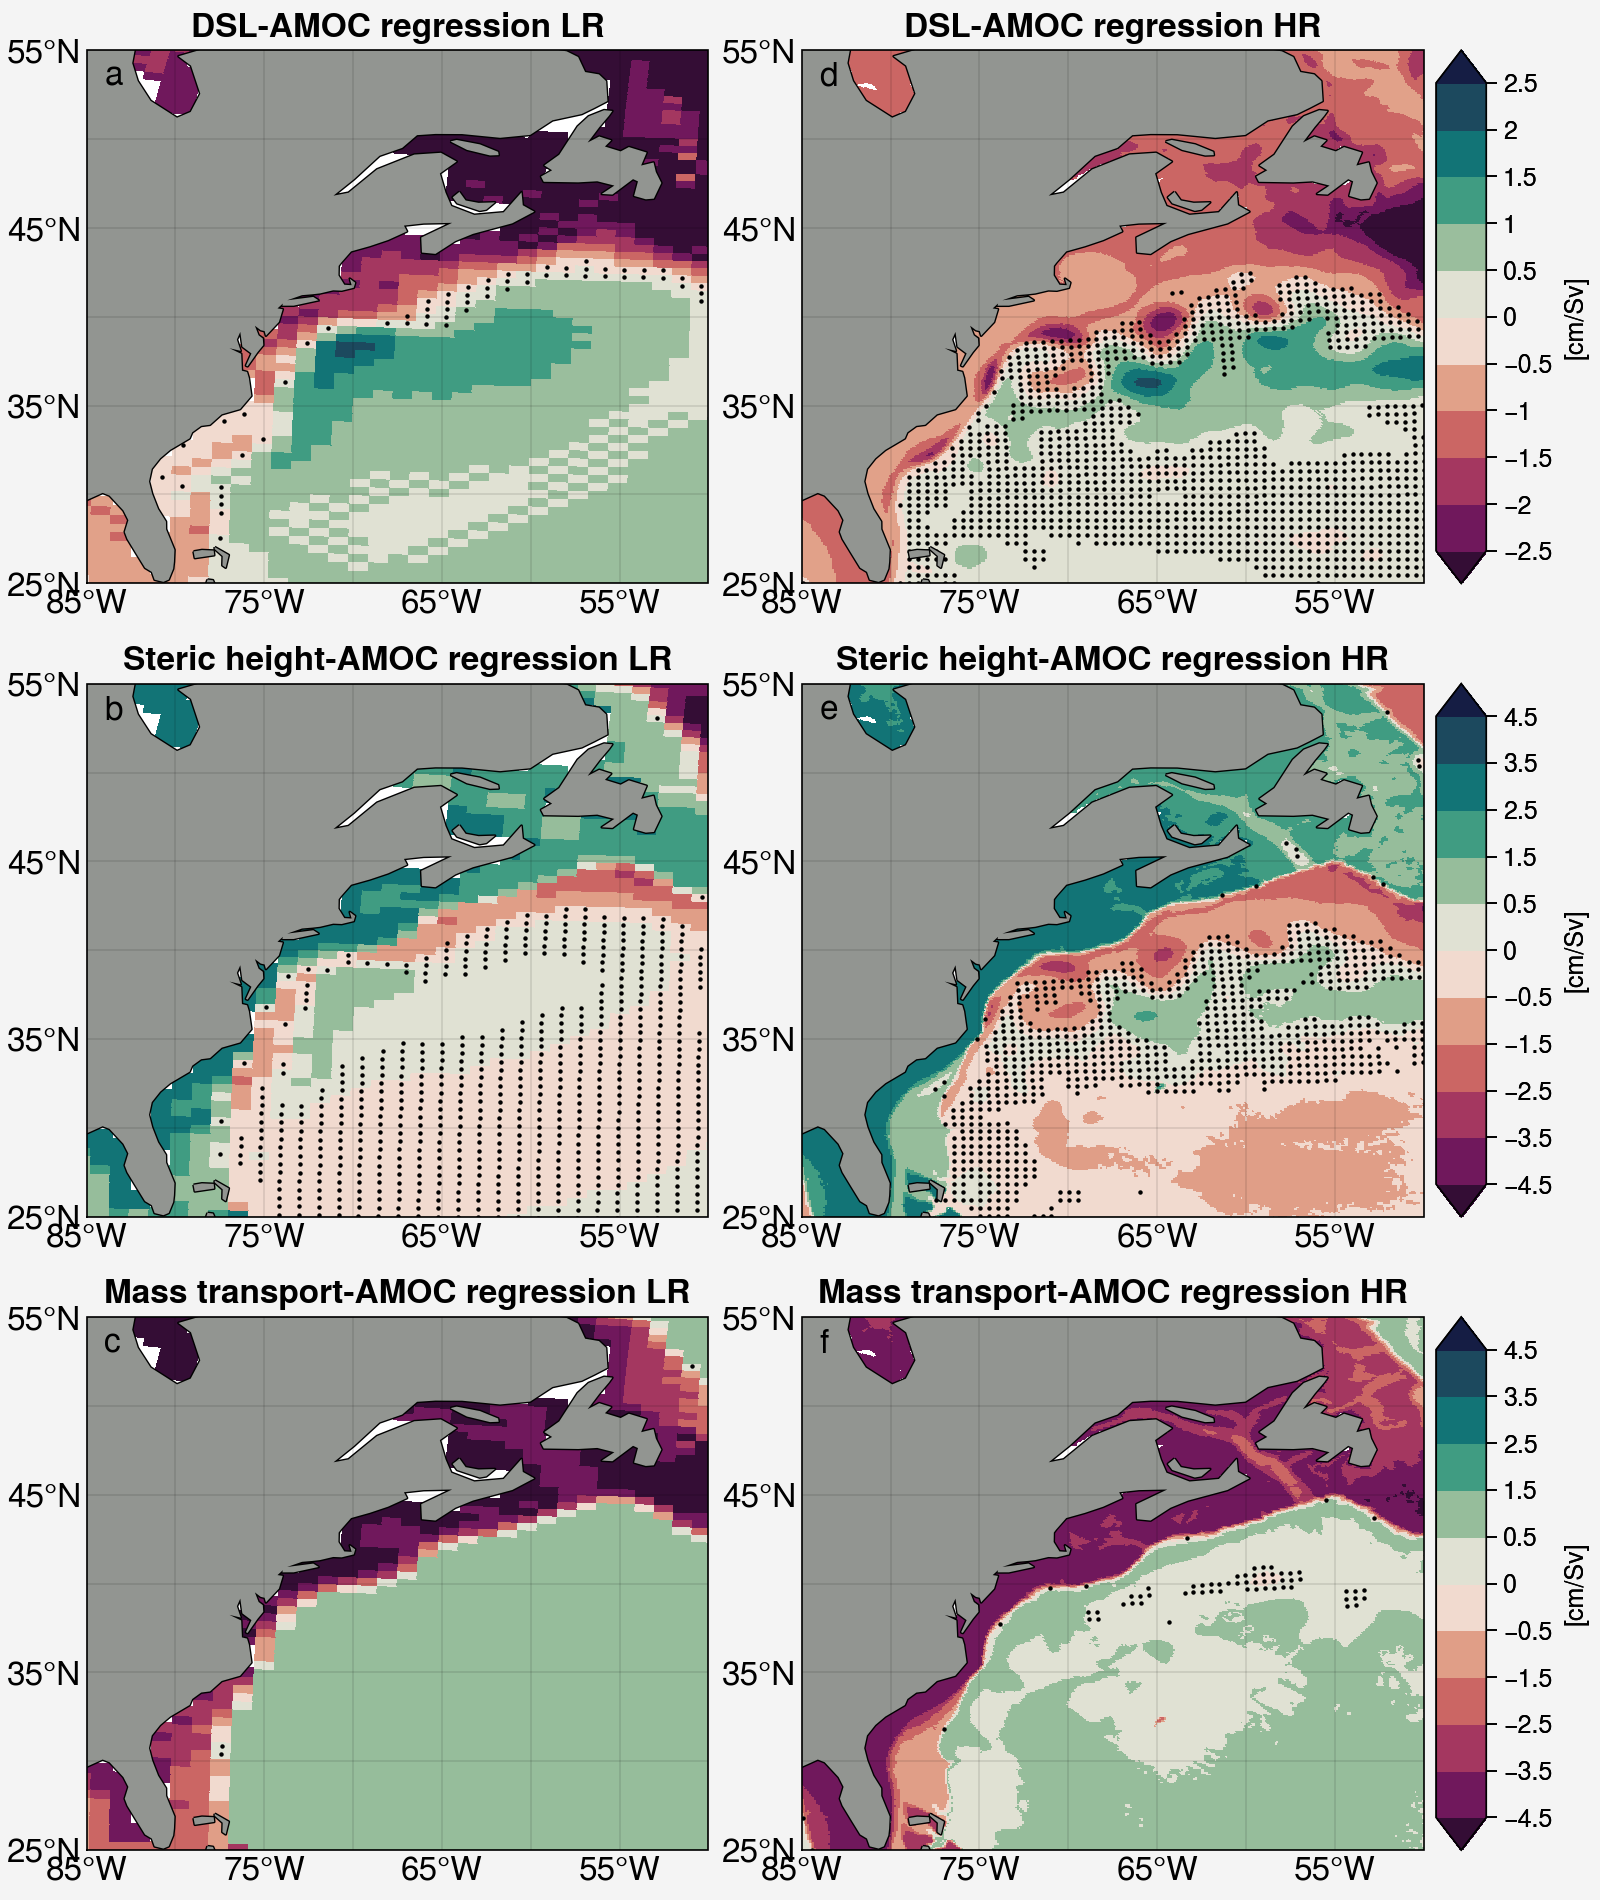

In [20]:
pc = cartopy.crs.PlateCarree()
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()

fig1, axs = plot.subplots(nrows=3,ncols=2,proj='cyl',width='8in',height='9.5in')

m00=axs[0,0].pcolormesh(ds_r_g16.TLONG, ds_r_g16.TLAT, 
        ssh2amoc_r_TLmCL,levels=np.arange(-2.5, 2.5+0.1, 0.5), 
        transform=pc, cmap="curl_r", extend='both')
axs[0,0].scatter(lonmssh2_r_g16,latmssh2_r_g16,transform=pc, marker='o',s=1,c='k')
axs[0,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,0].format(land=True, landcolor='grey')
axs[0,0].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[0,0].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[0,0].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[0,0].xaxis.set_major_formatter(lon_formatter)
axs[0,0].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[0,0].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[0,0].yaxis.set_major_formatter(lat_formatter)
axs[0,0].set_title('DSL-AMOC regression LR', fontsize=12, fontweight='bold')
axs[0,0].text(-84, 53, 'a', transform=pc, fontsize=12)


m01=axs[0,1].pcolormesh(ds_r_t12.TLONG, ds_r_t12.TLAT, 
        ssh2amoc_r_THmCH,levels=np.arange(-2.5, 2.5+0.1, 0.5), 
        transform=pc, cmap="curl_r", extend='both')
axs[0,1].scatter(lonmssh2_r_t12[::5,::5],latmssh2_r_t12[::5,::5],transform=pc, marker='o',s=1,c='k')
axs[0,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[0,1].format(land=True, landcolor='grey')
axs[0,1].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[0,1].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[0,1].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[0,1].xaxis.set_major_formatter(lon_formatter)
axs[0,1].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[0,1].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[0,1].yaxis.set_major_formatter(lat_formatter)
axs[0,1].set_title('DSL-AMOC regression HR', fontsize=12, fontweight='bold')
axs[0,1].text(-84, 53, 'd', transform=pc, fontsize=12)
# add colorbar
cb = axs[0,1].colorbar(m01,loc='r', label='[cm/Sv]',width='2em')


m10=axs[1,0].pcolormesh(ds_r_g16.TLONG, ds_r_g16.TLAT, 
        hst2amoc_r_TLmCL,levels=[-4.5,-3.5,-2.5,-1.5,-0.5,0,0.5,1.5,2.5,3.5,4.5], 
        transform=pc, cmap="curl_r", extend='both')
axs[1,0].scatter(lonmhst2_r_g16,latmhst2_r_g16,transform=pc, marker='o',s=1,c='k')
axs[1,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,0].format(land=True, landcolor='grey')
axs[1,0].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[1,0].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[1,0].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[1,0].xaxis.set_major_formatter(lon_formatter)
axs[1,0].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[1,0].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[1,0].yaxis.set_major_formatter(lat_formatter)
axs[1,0].set_title('Steric height-AMOC regression LR', fontsize=12, fontweight='bold')
axs[1,0].text(-84, 53, 'b', transform=pc, fontsize=12)
# axs[1,0].text(-65, 50.5, "Gulf of \nSt. Lawrence", transform=pc, fontsize=8)
# axs[1,0].text(-73, 45, "Gulf of Maine", transform=pc, fontsize=8)


m11=axs[1,1].pcolormesh(ds_r_t12.TLONG, ds_r_t12.TLAT, 
        hst2amoc_r_THmCH,levels=[-4.5,-3.5,-2.5,-1.5,-0.5,0,0.5,1.5,2.5,3.5,4.5], 
        transform=pc, cmap="curl_r", extend='both')
axs[1,1].scatter(lonmhst2_r_t12[::5,::5],latmhst2_r_t12[::5,::5],transform=pc, marker='o',s=1,c='k')
axs[1,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[1,1].format(land=True, landcolor='grey')
axs[1,1].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[1,1].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[1,1].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[1,1].xaxis.set_major_formatter(lon_formatter)
axs[1,1].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[1,1].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[1,1].yaxis.set_major_formatter(lat_formatter)
axs[1,1].set_title('Steric height-AMOC regression HR', fontsize=12, fontweight='bold')
axs[1,1].text(-84, 53, 'e', transform=pc, fontsize=12)
# add colorbar
cb = axs[1,1].colorbar(m11,loc='r', label='[cm/Sv]',width='2em')

m20=axs[2,0].pcolormesh(ds_r_g16.TLONG, ds_r_g16.TLAT, 
        hm2amoc_r_TLmCL,levels=[-4.5,-3.5,-2.5,-1.5,-0.5,0,0.5,1.5,2.5,3.5,4.5], 
        transform=pc, cmap="curl_r", extend='both')
axs[2,0].scatter(lonmhm2_r_g16,latmhm2_r_g16,transform=pc, marker='o',s=1,c='k')
axs[2,0].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,0].format(land=True, landcolor='grey')
axs[2,0].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[2,0].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[2,0].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[2,0].xaxis.set_major_formatter(lon_formatter)
axs[2,0].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[2,0].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[2,0].yaxis.set_major_formatter(lat_formatter)
axs[2,0].set_title('Mass transport-AMOC regression LR', fontsize=12, fontweight='bold')
axs[2,0].text(-84, 53, 'c', transform=pc, fontsize=12)


m21=axs[2,1].pcolormesh(ds_r_t12.TLONG, ds_r_t12.TLAT, 
        hm2amoc_r_THmCH,levels=[-4.5,-3.5,-2.5,-1.5,-0.5,0,0.5,1.5,2.5,3.5,4.5], 
        transform=pc, cmap="curl_r", extend='both')
axs[2,1].scatter(lonmhm2_r_t12[::5,::5],latmhm2_r_t12[::5,::5],transform=pc, marker='o',s=1,c='k')
axs[2,1].coastlines(resolution='110m', color='black', linewidth=1)
axs[2,1].format(land=True, landcolor='grey')
axs[2,1].set_extent([lon1_r, lon2_r, lat1_r, lat2_r], crs=pc)
axs[2,1].set_xticks(np.arange(lon1_r,lon2_r+1,10), crs=pc)
axs[2,1].set_xticklabels(np.arange(lon1_r,lon2_r+1,10), fontsize=12)
axs[2,1].xaxis.set_major_formatter(lon_formatter)
axs[2,1].set_yticks(np.arange(lat1_r,lat2_r+1, 10), crs=pc)
axs[2,1].set_yticklabels(np.arange(lat1_r,lat2_r+1, 10), fontsize=12)
axs[2,1].yaxis.set_major_formatter(lat_formatter)
axs[2,1].set_title('Mass transport-AMOC regression HR', fontsize=12, fontweight='bold')
axs[2,1].text(-84, 53, 'f', transform=pc, fontsize=12)
# add colorbar
cb = axs[2,1].colorbar(m21,loc='r', label='[cm/Sv]',width='2em')

fig1.savefig(pic1,bbox_inches='tight')

# Appendix

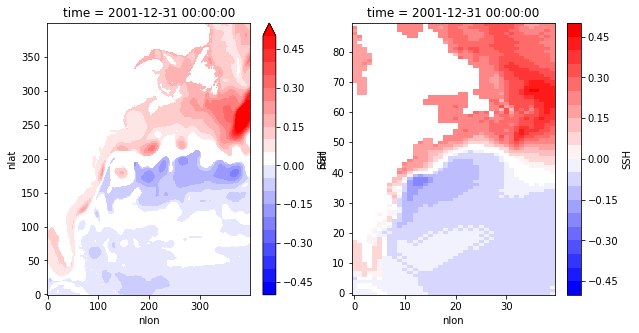

In [35]:
ssh2_tr_r_THmCH_x = ssh2_r_THmCH.isel(time=0) - ssh2_r_THmCH.isel(time=0) + ssh2_tr_r_THmCH
ssh2_trm_r_THmCH_x = ssh2_r_THmCH.isel(time=0) - ssh2_r_THmCH.isel(time=0) + ssh2_trm_r_THmCH
ssh2_tr_r_TLmCL_x = ssh2_r_TLmCL.isel(time=0) - ssh2_r_TLmCL.isel(time=0) + ssh2_tr_r_TLmCL
ssh2_trm_r_TLmCL_x = ssh2_r_TLmCL.isel(time=0) - ssh2_r_TLmCL.isel(time=0) + ssh2_trm_r_TLmCL
# ssh2_tr_r_THmCH_x.plot()
fig, axs = plt.subplots(1,2,figsize=(10,5))
ssh2_trm_r_THmCH_x.plot(ax=axs[0], vmin=-0.5, vmax=0.5, levels=np.arange(-0.5,0.5+0.01, 0.05), cmap='bwr')
ssh2_trm_r_TLmCL_x.plot(ax=axs[1], vmin=-0.5, vmax=0.5, levels=np.arange(-0.5,0.5+0.01, 0.05), cmap='bwr')

In [ ]:
# ds_hst_TH = ds_hst_TH_raw.where(((ds_hst_TH_raw.time!=2033) & (ds_hst_TH_raw.time!=2038) & (ds_hst_TH_raw.time!=2052)), drop=True)
# ds_hst_TH = 
# # ds_hst_TH1.sel(time=2033).h_rst.plot()

# ds_hst_TH = ds_ssh_TH_raw.drop_sel(time=[2033,2038,2052])
# ds_hst_TH = ds_hst_TH.interp(time=time_en)
# ds_hst_TH

# infile_hst_TH = ('/scratch/user/dapengli/Projects4iHESP/'
#                  'Project_SeaLevelUSEastCoast_2021Mar30/data_after_manipulation/'
#                  'RegionalStericHeight/test_2021Apr20/'
#                  'B.E.13.BRCP85C5CN.ne120_t12.sehires38.003.sunway_RegionalStericHeight1850-2100_2021May21.nc')
# ds_hst_TH_raw = xr.open_dataset(infile_hst_TH,chunks=chunks_HR)
# ds_hst_TH_raw = ds_hst_TH_raw.assign_coords(time=time_en)

# ds_hst_TH = ds_hst_TH_raw.drop_sel(time=[2033,2038,2052])
# ds_hst_TH = ds_hst_TH.interp(time=time_en)
# ds_hst_TH

# ds_hst_TH_despk
# ds_hst_CL1.mean(('nlon','nlat')).h_rst.plot()
# ds_hst_TH.h_rst.mean(('nlon','nlat')).plot()
# ds_hst_TH.h_rst.isel(time=0).plot(cmap='viridis')

# ds_hst_TH.h_rst.sel(time=2033).plot(vmin=-8000,vmax=8000)
# ds_hst_TH.h_rst.sel(time=2034).plot(vmin=-8000,vmax=8000)

# h_rst_gl_a_TH.where(h_rst_gl_a_TH>50, drop=True).squeeze()

# ssh1_NA_TH = ds_ssh_TH.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#     nlon=slice(nlon1_NA_t12, nlon2_NA_t12),nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()

# ssh1_NA_TH = ssh1_NA_TH.assign_coords(time=time1_yr_ssh)
# ssh1_NA_TH

# ssh1tr_NA_TH = ssh1_NA_TH.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10
# ssh1tr_NA_TH.plot()

# ssh1_NA_THmCH = (ssh1_NA_TH-ssh1_NA_CH).polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10
# ssh1_NA_THmCH.plot(vmin=-5,vmax=5,cmap='bwr')

# ssh1tr_NA_TH.plot(vmin=-5,vmax=5,cmap='bwr')
# (ssh1tr_NA_TH - ssh1tr_NA_CH).plot(vmin=-5,vmax=5,cmap='bwr')

# ssh1_NA_CH = ds_ssh_CH.SSH.sel(time=slice('1993','2019')).resample(time='A').mean('time').isel(
#     nlon=slice(nlon1_NA_t12, nlon2_NA_t12),nlat=slice(nlat1_NA_t12, nlat2_NA_t12)).compute()
# time1_yr_ssh_cesm = np.arange(1993.05,2019.05+1)
# ssh1_NA_CH = ssh1_NA_CH.assign_coords(time=time1_yr_ssh_cesm)
# print(ssh1_NA_CH.time)

# ssh1tr_NA_CH = ssh1_NA_CH.polyfit(dim='time',deg=1).polyfit_coefficients.sel(degree=1)*10
# ssh1tr_NA_CH.plot()